                                                            ASSIGNMENT NO:02

Name: Balasaheb Narayan Hinge

Class: BE Computer-A

Batch: C

Roll No.: 21CO047

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
X=df.drop(columns=["Email No.","Prediction"])
Y=df['Prediction']

In [8]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

**K Nearest Neighbor Algorithm**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [13]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [14]:
y_pred=knn.predict(xtest)

In [15]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,f1_score,recall_score,classification_report

In [16]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[963, 148],
       [ 80, 361]], dtype=int64)

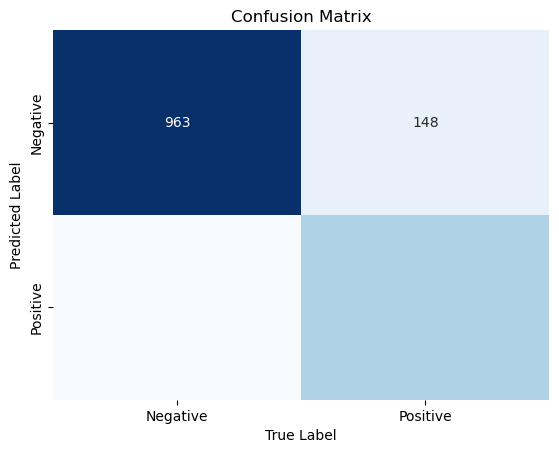

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(ticks=[1.5, 0.5], labels=['Positive', 'Negative'])  # Customize x-axis tick labels
plt.yticks(ticks=[1.5, 0.5], labels=['Positive','Negative'])  # Customize y-axis tick labels
plt.show()

**Classification Report:** Evaluation Metrices

In [18]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1111
           1       0.71      0.82      0.76       441

    accuracy                           0.85      1552
   macro avg       0.82      0.84      0.83      1552
weighted avg       0.86      0.85      0.86      1552



**Support Vector Machine Algorithm**

In [19]:
from sklearn.svm import SVC

In [20]:
sv = SVC(kernel='linear', random_state=42)
sv.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=42)

In [21]:
ypredict=sv.predict(xtest)

In [22]:
cmm=confusion_matrix(ytest,ypredict)
cmm

array([[1072,   39],
       [  32,  409]], dtype=int64)

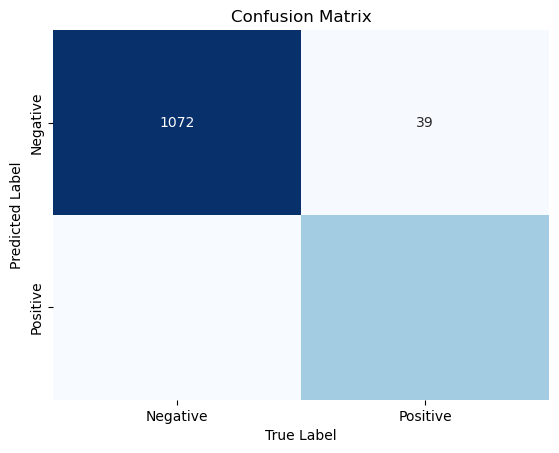

In [23]:
sns.heatmap(cmm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(ticks=[1.5, 0.5], labels=['Positive', 'Negative'])  # Customize x-axis tick labels
plt.yticks(ticks=[1.5, 0.5], labels=['Positive','Negative'])  # Customize y-axis tick labels
plt.show()

**Classification Report:** Evaluation Metrices

In [24]:
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1111
           1       0.91      0.93      0.92       441

    accuracy                           0.95      1552
   macro avg       0.94      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552

